In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from random import shuffle

import seaborn.apionly as sns
%config InlineBackend.figure_format = 'retina'
rc('savefig', dpi = 300)
rc('figure', dpi = 100)

def format_plot(xlabel, ylabel, title, width=5, height=4, grid='on'):
    f = plt.gcf()
    f.set_size_inches(width,height)
    ax = plt.gca()
    sns.despine(offset=10)
    plt.grid(grid)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, loc='left', fontweight='bold')
    
    leg = ax.get_legend()
    if leg is not None:
        leg.get_frame().set_linewidth(0.0)
        leg.get_frame().set_alpha(1)

    plt.tight_layout()

c:\users\jason\appdata\local\programs\python\python36\lib\site-packages\seaborn\apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
recipes = {}
types = {}

with open('Recipes.csv', 'r', encoding='utf-8') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(spamreader):
        if i > 0:
            name = row[0]
            types[name] = row[1]
            recipes[name] = row[2:7]
        
inglist = []
for recipe in recipes:
    for ing in recipes[recipe]:
        inglist.append(ing)
        
shuffle(inglist)

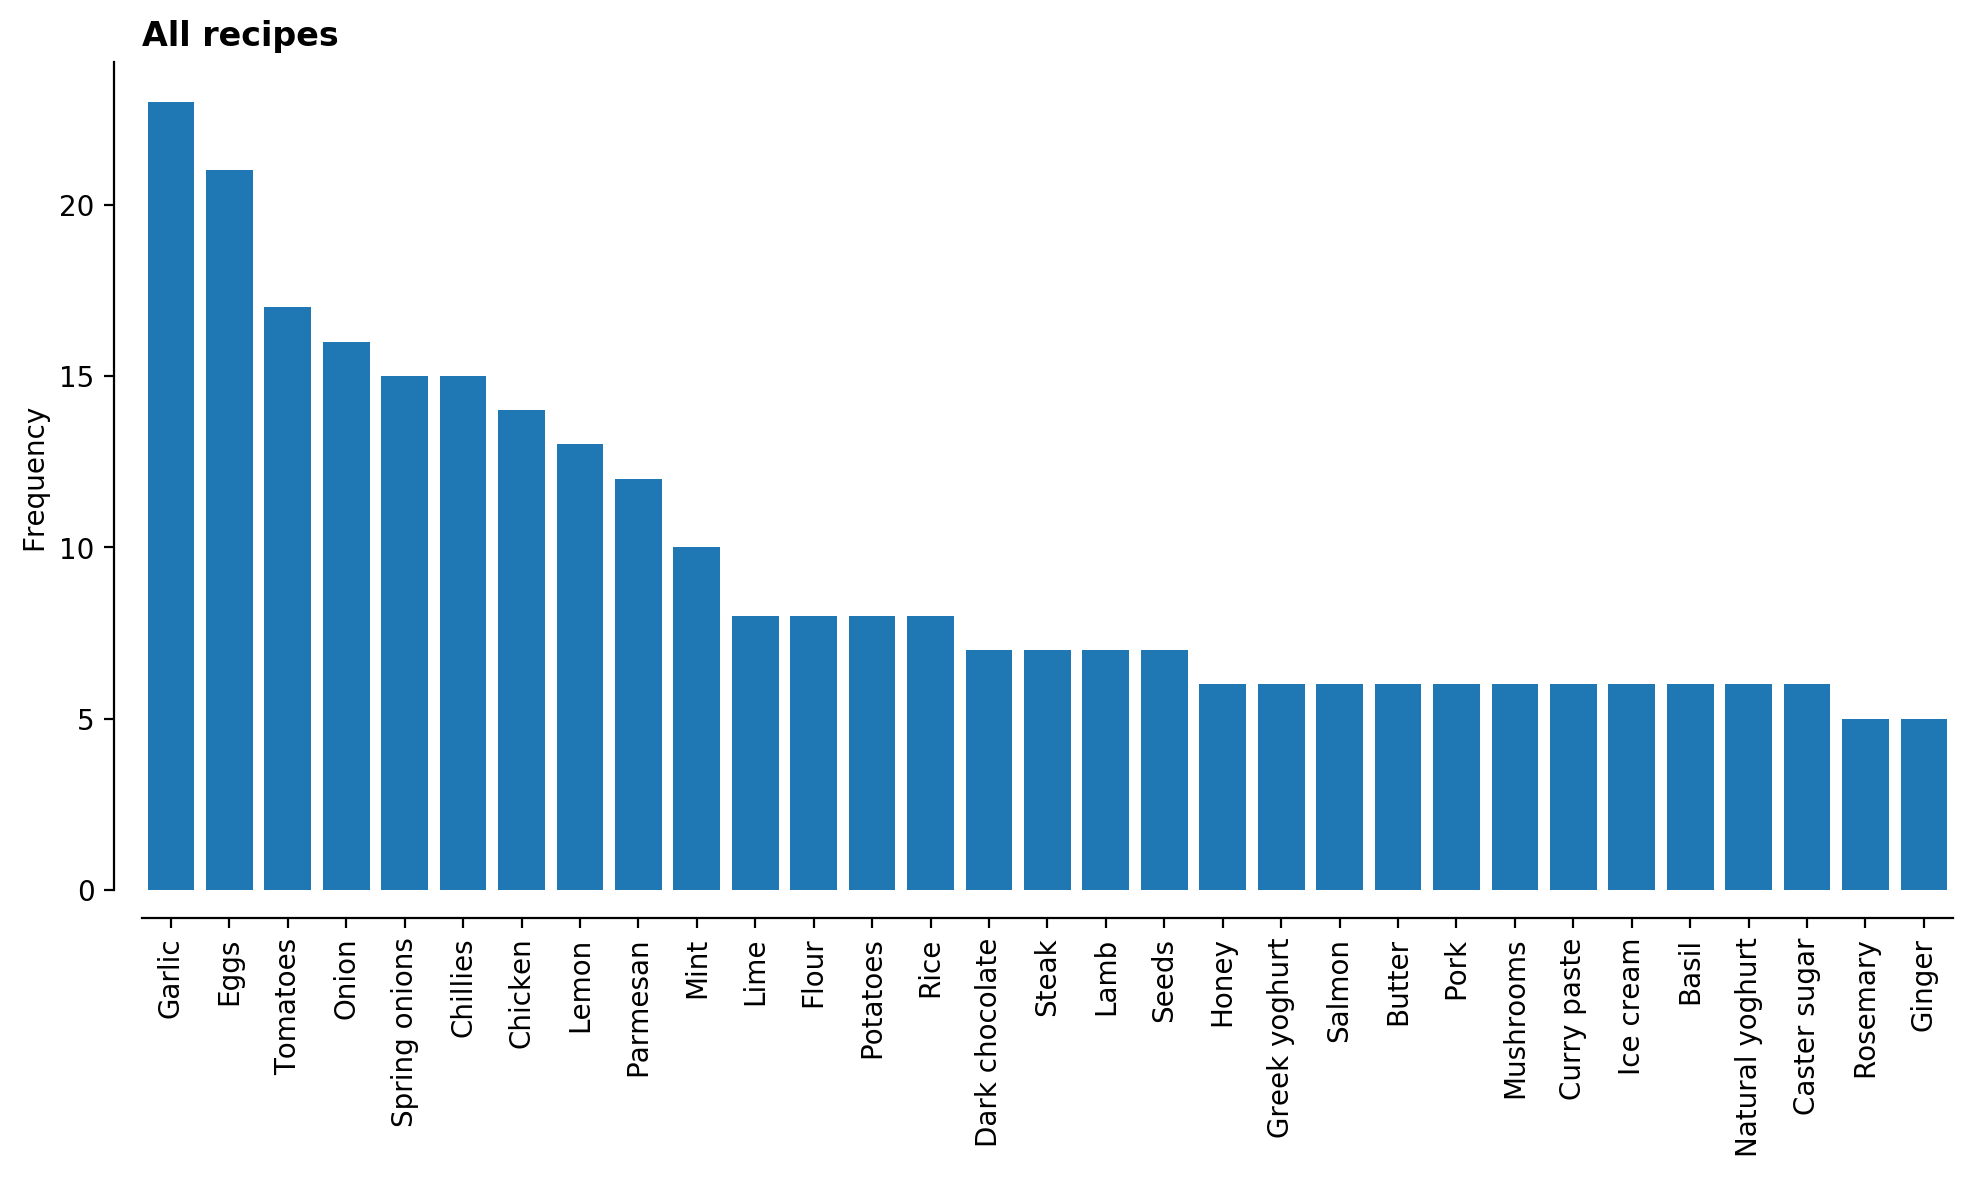

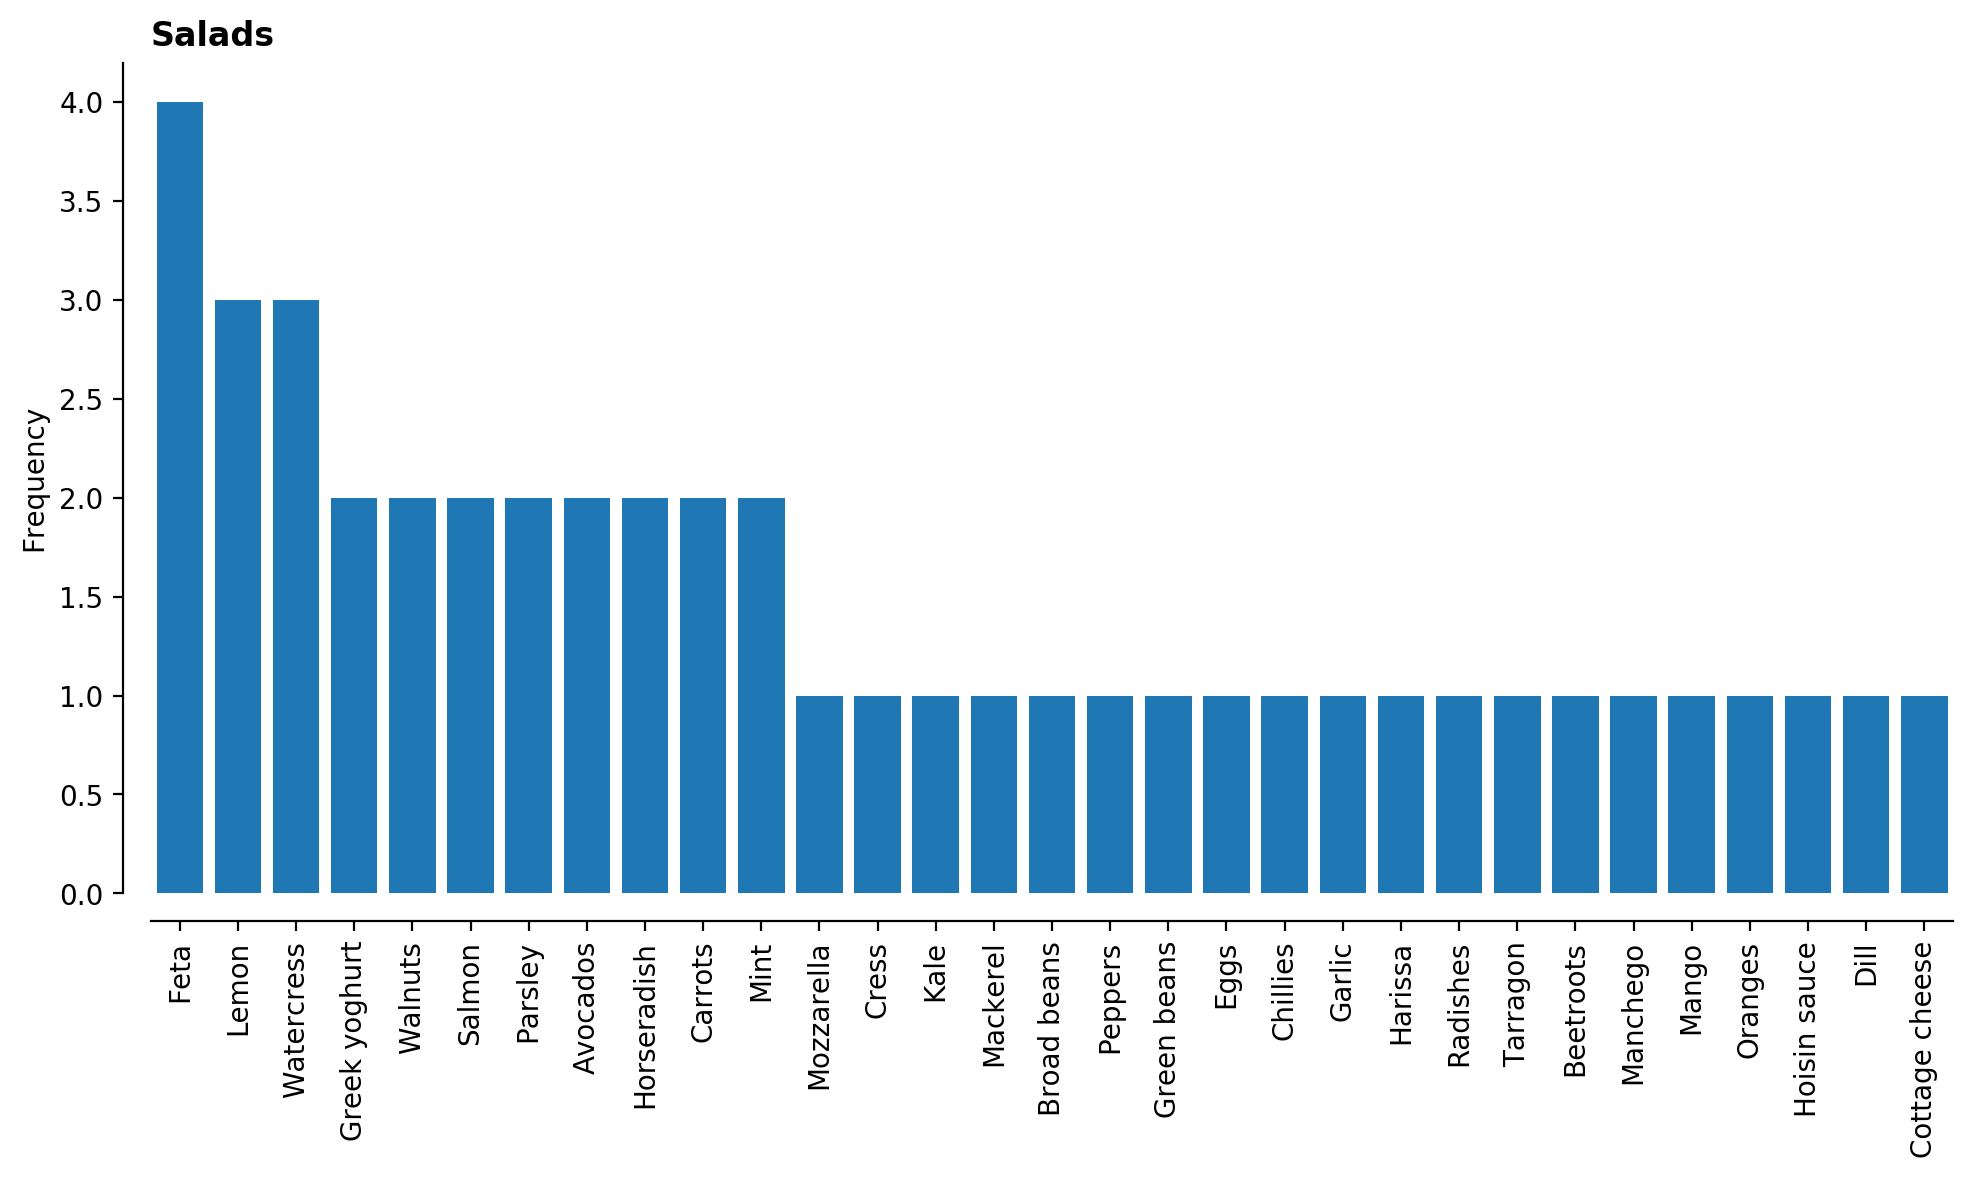

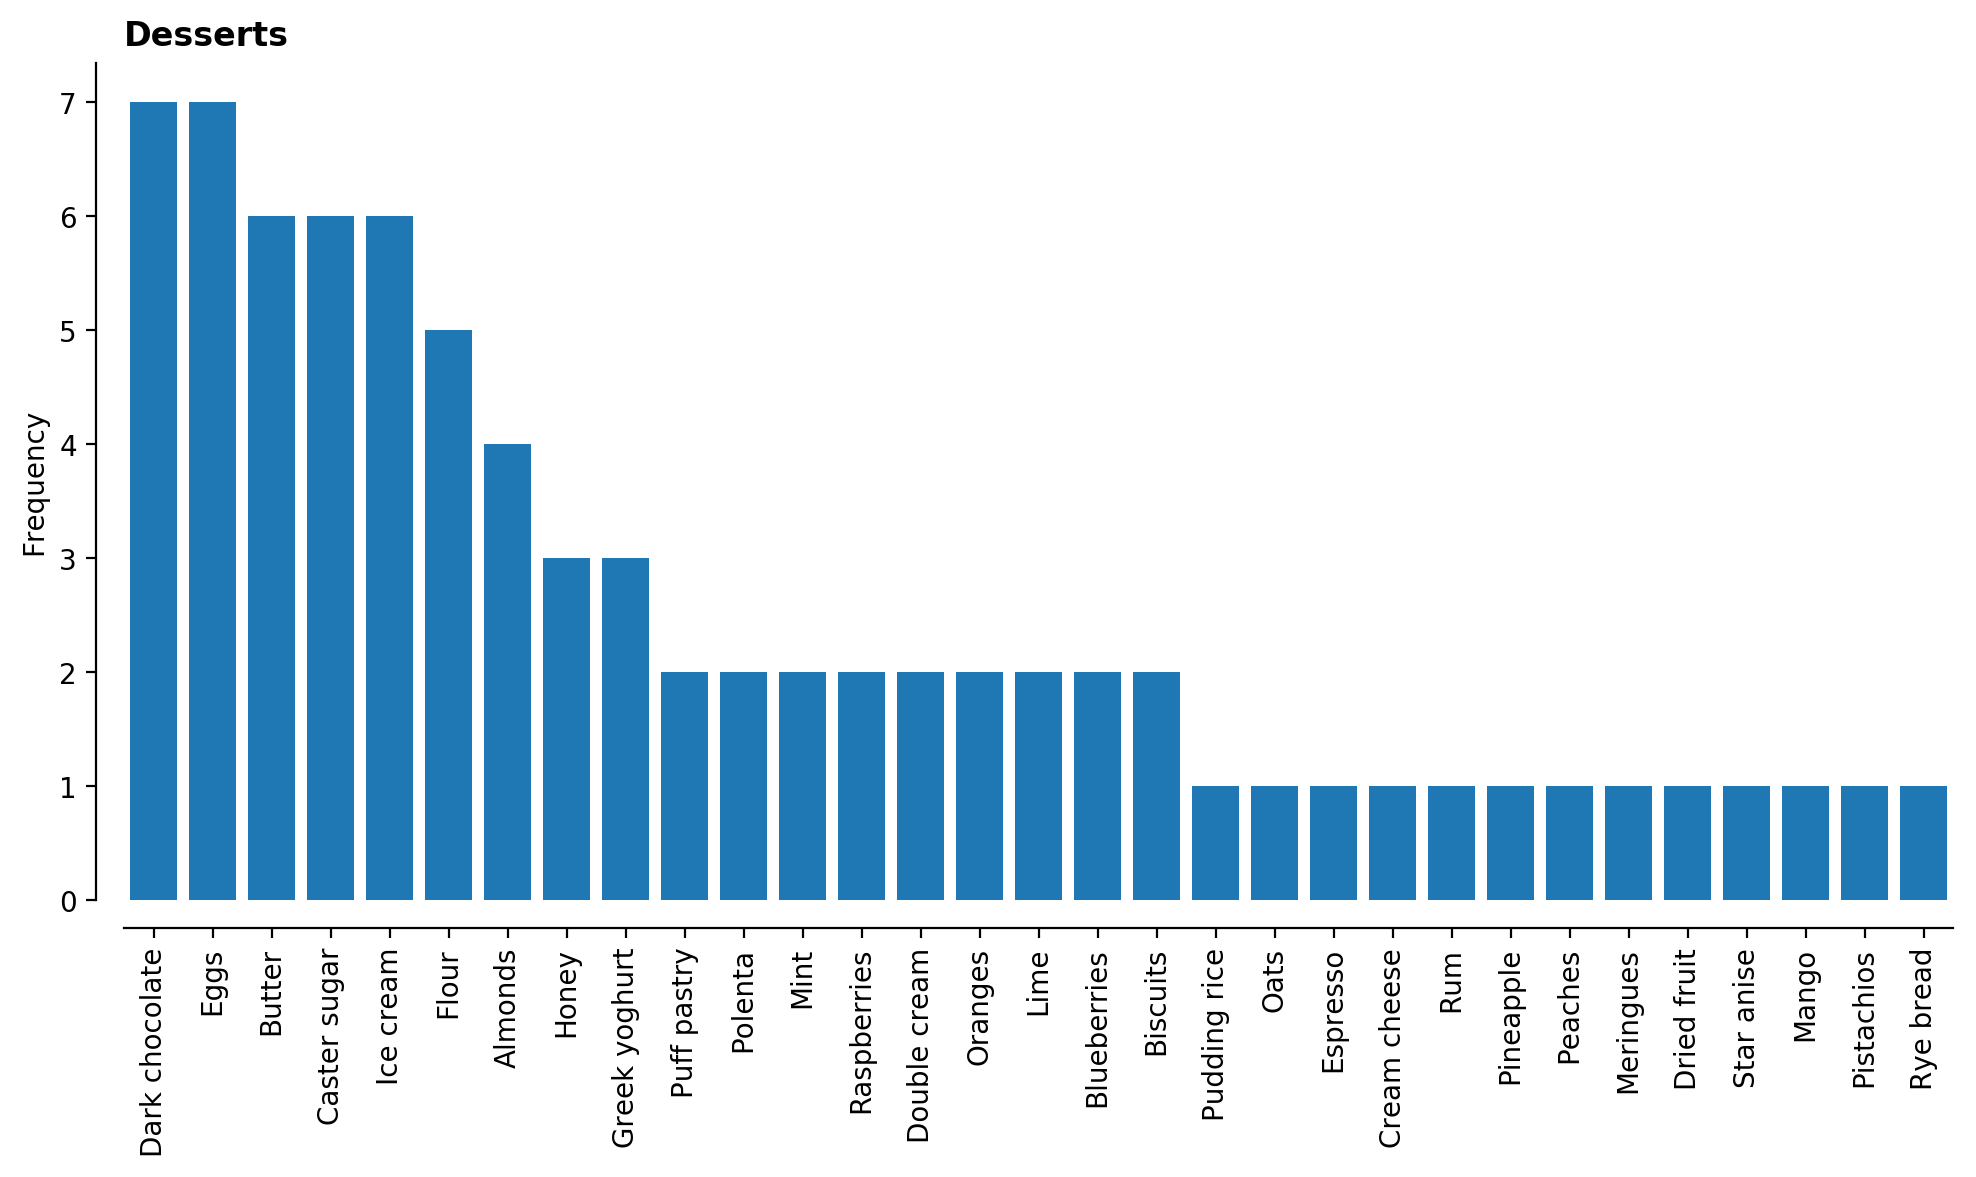

In [15]:
def plot_histogram(inglist, title):
    counts = {}
    ing_unique = list(set(inglist))
    Ning = len(ing_unique)

    for ing in inglist:
        if ing in counts:
            counts[ing] += 1
        else:
            counts[ing] = 1

    counts_arr = np.zeros(Ning)
    for i, ing in enumerate(ing_unique):
        counts_arr[i] = counts[ing]

    ind_s = np.argsort(-counts_arr)

    ing_s = []
    for i in range(Ning):
        ing_s.append(ing_unique[ind_s[i]])

    plt.bar(np.arange(Ning)+0.5, counts_arr[ind_s])

    format_plot('', 'Frequency', title, width=10, height=6, grid='off')
    plt.xticks(np.arange(100)+0.5, ing_s, rotation=90)
    plt.xlim(0, 31)
    plt.tight_layout()

plot_histogram(inglist, 'All recipes')
plt.savefig('Hist_all.png', dpi=200)
plt.show()
plot_histogram([ing for ings in [rec for rec in [recipes[r] for r in recipes if types[r] == 'Salad']] for ing in ings], 'Salads')
plt.savefig('Hist_salad.png', dpi=200)
plt.show()
plot_histogram([ing for ings in [rec for rec in [recipes[r] for r in recipes if types[r] == 'Sweet treats']] for ing in ings], 'Desserts')
plt.savefig('Hist_dessert.png', dpi=200)
plt.show()

In [4]:
ing_unique = list(set(inglist))
Ning = len(ing_unique)
counts = {}

for ing in inglist:
    if ing in counts:
        counts[ing] += 1
    else:
        counts[ing] = 1

counts_arr = np.zeros(Ning)
for i, ing in enumerate(ing_unique):
    counts_arr[i] = counts[ing]

ind_s = np.argsort(-counts_arr)

ing_s = []
for i in range(Ning):
    ing_s.append(ing_unique[ind_s[i]])

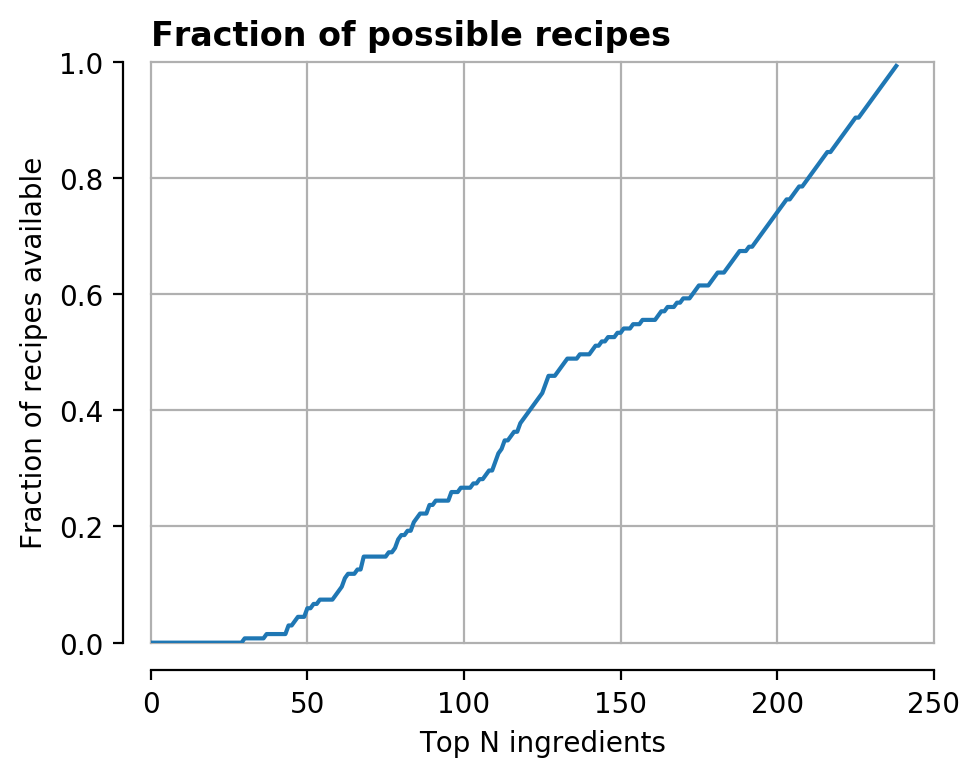

c:\users\jason\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


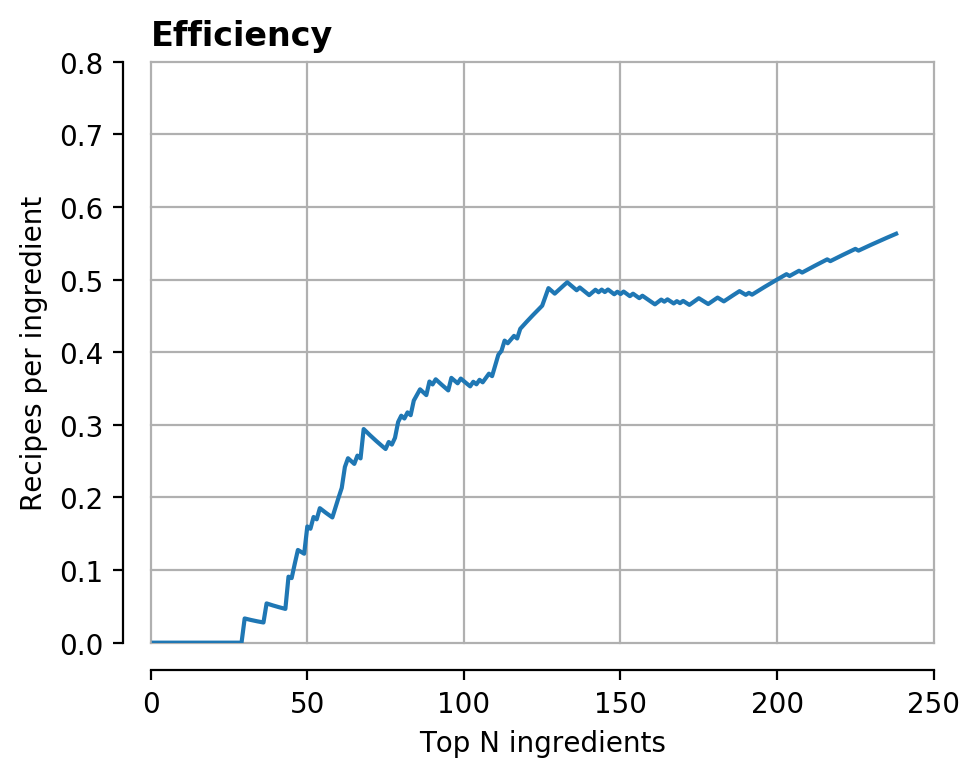

In [5]:
def num_possible_recipes(recipes, ings):
    recipe_count = 0
    for r in recipes:
        ing_count = 0
        
        for r_ing in recipes[r]:
            if r_ing in ings:
                ing_count += 1
        
        if ing_count == 5:
            recipe_count += 1
            
    return recipe_count

def possible_recipes(recipes, ings):
    for r in recipes:
        ing_count = 0
        for r_ing in recipes[r]:
            if r_ing in ings:
                ing_count += 1
        
        if ing_count == 5:
            yield r

# Top N most popular ingredients
upto = Ning
num = np.array([num_possible_recipes(recipes, ings) for ings in [ing_s[:N] for N in range(upto)]])

plt.plot(range(upto), num/len(recipes))
format_plot('Top N ingredients', 'Fraction of recipes available', 'Fraction of possible recipes')
plt.xlim(0, 250); plt.ylim(0, 1)
plt.savefig('Frac_sorted.png', dpi=200)
plt.show()

plt.plot(range(upto), num/np.arange(upto))
format_plot('Top N ingredients', 'Recipes per ingredient', 'Efficiency')
plt.xlim(0, 250); plt.ylim(0, .8)
plt.savefig('Efficiency_sorted.png', dpi=200)
plt.show()

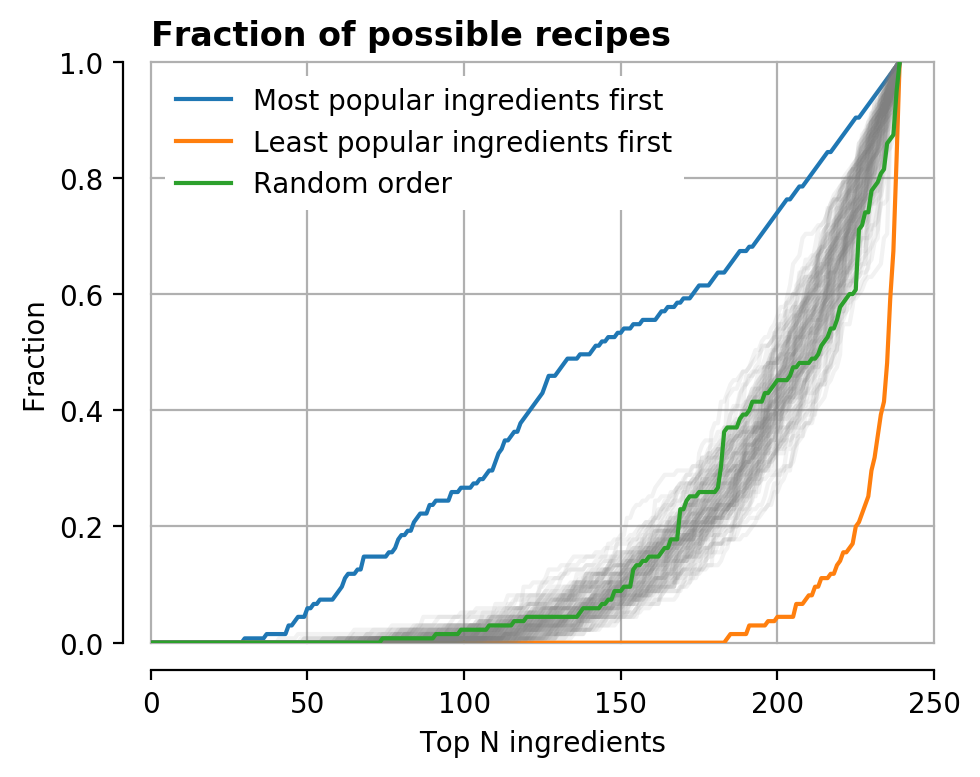

In [6]:
upto = Ning+1
ordering = ing_s
num = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(upto)]])
plt.plot(range(upto), num/len(recipes), label='Most popular ingredients first')
plt.xlim(0, 250), plt.ylim(0, 1)

ordering = ing_s[::-1]
num = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(upto)]])
plt.plot(range(upto), num/len(recipes), label='Least popular ingredients first')

for i in range(100):
    ordering = ing_s[:]
    shuffle(ordering)
    num = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(upto)]])
    plt.plot(range(upto), num/len(recipes), c='gray', alpha=0.1)
    
ordering = ing_s[:]
shuffle(ordering)
num = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(upto)]])
plt.plot(range(upto), num/len(recipes), label='Random order')

plt.legend()
format_plot('Top N ingredients', 'Fraction', 'Fraction of possible recipes')
plt.savefig('Frac_random.png', dpi=200)

plt.show()

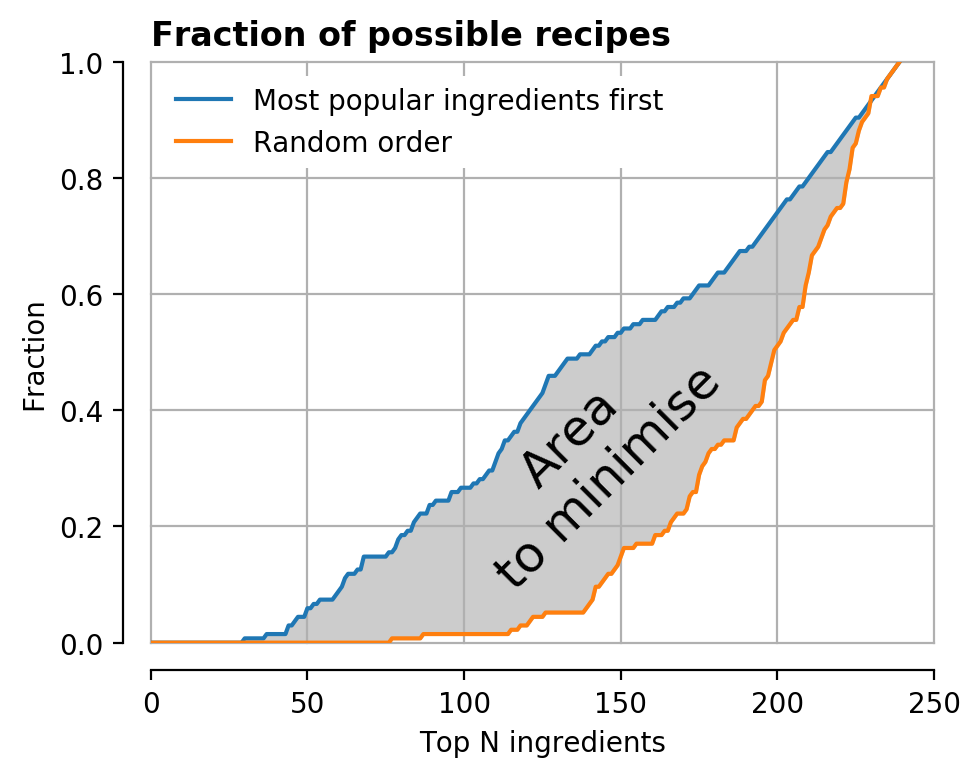

In [7]:
upto = Ning+1
ordering = ing_s
num = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(upto)]])
plt.plot(range(upto), num/len(recipes), label='Most popular ingredients first')
plt.xlim(0, 250), plt.ylim(0, 1)
    
ordering = ing_s[:]
shuffle(ordering)
num2 = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(upto)]])

plt.fill_between(range(upto), num/len(recipes), num2/len(recipes), color=[.8, .8, .8])

plt.plot(range(upto), num2/len(recipes), label='Random order')

plt.text(140, 0.4, 'Area\nto minimise', fontsize=18, rotation=45, ha='center')

plt.legend()
format_plot('Top N ingredients', 'Fraction', 'Fraction of possible recipes')
plt.savefig('Frac_shaded.png', dpi=200)

plt.show()

In [ ]:
# Optimisation - slow
upto = Ning+1
ordering = ing_s
num_sorted = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(upto)]])

weighting = np.arange(len(num_sorted))
weighting[:50] = 506
weighting[50:] = 1

Nit = 10000
score = 0
scores = np.zeros((Nit,1))

for it in range(Nit):
    new_ordering = ordering[:]
    i, j = np.random.randint(len(ordering), size=2)
    new_ordering[i], new_ordering[j] = new_ordering[j], new_ordering[i]
    num_sorted_new = np.array([num_possible_recipes(recipes, ings) for ings in [new_ordering[:N] for N in range(upto)]])
    new_score = np.sum(weighting * (num_sorted_new - num_sorted))
    
    scores[it] = new_score
    
    if new_score > score:
        score = new_score
        ordering = new_ordering[:]
        print('Iteration ' + str(it) + ' score = ' + str(score))

    if it % 100 == 0:
        num_sorted_new = np.array([num_possible_recipes(recipes, ings) for ings in [new_ordering[:N] for N in range(Ning+1)]])
        f, ax = plt.subplots(1,2,figsize=(10,4))
        plt.sca(ax[0])
        plt.plot(range(Ning+1), num_sorted/len(recipes))
        plt.plot(range(Ning+1), num_sorted_new/len(recipes))
        plt.sca(ax[1])
        plt.plot(scores, '.')
        plt.show()

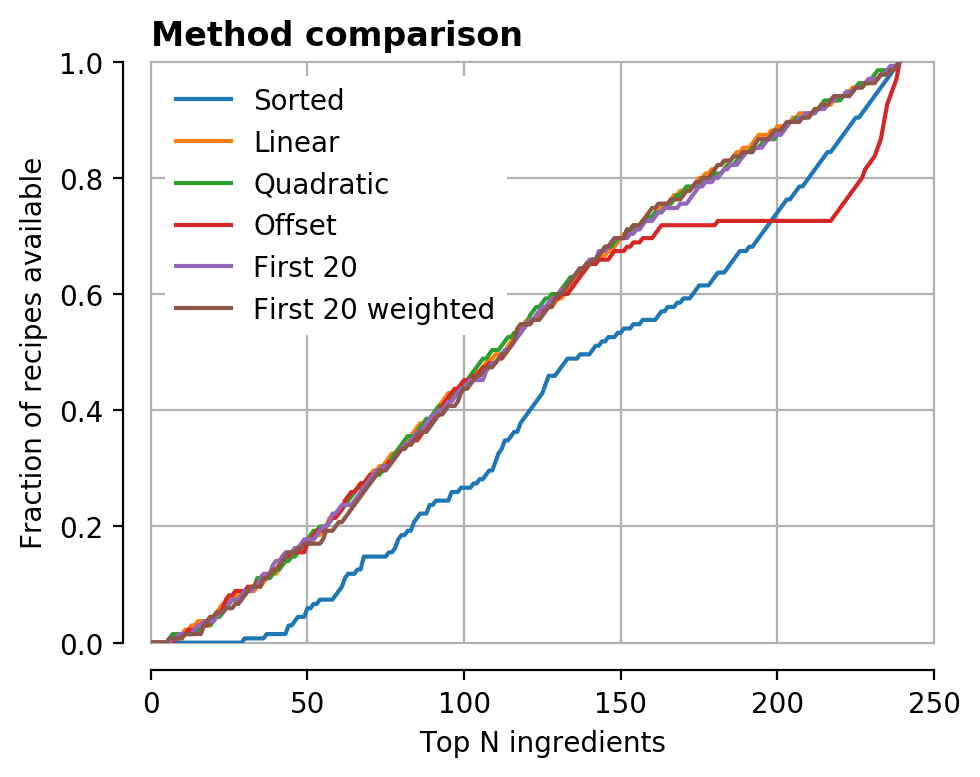

In [18]:
# Before this cell, the orderings from the above cell were manually saved
num_sorted = np.array([num_possible_recipes(recipes, ings) for ings in [ing_s[:N] for N in range(Ning+1)]])
plt.plot(range(Ning+1), num_sorted/len(recipes), label='Sorted')

for fname, flabel in zip(['Best_linear.txt', 'Best_quad.txt', 'Best_offset.txt', 'Best_first20.txt', 'Best_first20_50.txt'], 
                         ['Linear', 'Quadratic', 'Offset', 'First 20', 'First 20 weighted']):
    ordering = []
    with open(fname, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(reader):
            ordering.append(row[0][2:-1])

    ordering[-1] = ordering[-1][:-1]

    num_new = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(Ning+1)]])
    plt.plot(range(Ning+1), num_new/len(recipes), label=flabel)
    
plt.legend()
format_plot('Top N ingredients', 'Fraction of recipes available', 'Method comparison')
plt.xlim(0, 250); plt.ylim(0,1)
plt.tight_layout()
plt.savefig('Frac_all.png', dpi=200)
plt.show()

c:\users\jason\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
c:\users\jason\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


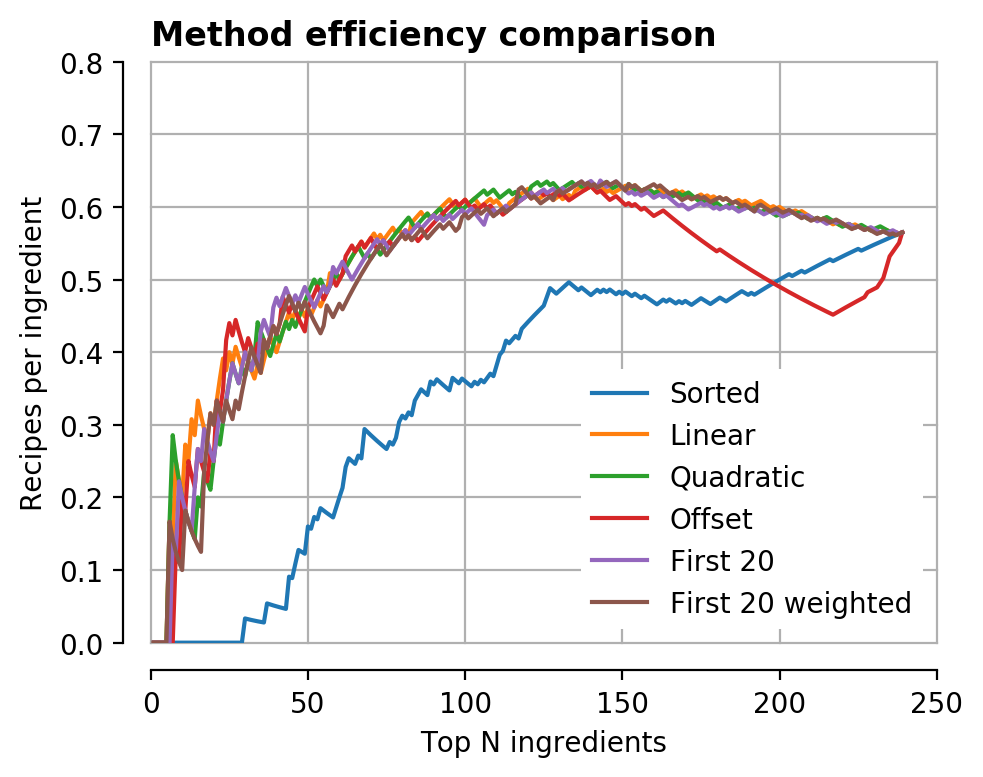

In [13]:
num_sorted = np.array([num_possible_recipes(recipes, ings) for ings in [ing_s[:N] for N in range(Ning+1)]])
plt.plot(range(Ning+1), num_sorted/np.arange(Ning+1), label='Sorted')

for fname, flabel in zip(['Best_linear.txt', 'Best_quad.txt', 'Best_offset.txt', 'Best_first20.txt', 'Best_first20_50.txt'], 
                         ['Linear', 'Quadratic', 'Offset', 'First 20', 'First 20 weighted']):
    ordering = []
    with open(fname, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(reader):
            ordering.append(row[0][2:-1])

    ordering[-1] = ordering[-1][:-1]

    num_new = np.array([num_possible_recipes(recipes, ings) for ings in [ordering[:N] for N in range(Ning+1)]])
    plt.plot(range(Ning+1), num_new/np.arange(Ning+1), label=flabel)
    
plt.legend()
format_plot('Top N ingredients', 'Recipes per ingredient', 'Method efficiency comparison')
plt.xlim(0, 250); plt.ylim(0,.8)
plt.savefig('Efficiency_all.png', dpi=200)
plt.show()